In [90]:
from scipy.stats import norm
import numpy as np

## 2.A
Estabeleça valores para os parâmetros populacionais do modelo: B_0, B_1 e S_2

In [91]:
B_0 = B_1 = 1
S_2 = 2
sample_size=25

## 2.B
Apresente os estimadores não viesados de e B_0, B_1 e S_2 . Explique como são
obtidos. Use um mínimo de equações.

In [92]:
def B_1_MLE(x_sample: np.array, y_sample: np.array):
    x_sample_mean = np.mean(x_sample)
    y_sample_mean = np.mean(y_sample)
    Sxy=Sxx=0
    for x, y in zip(x_sample, y_sample):
        Sxy += (x - x_sample_mean)*(y - y_sample_mean)
        Sxx += (x - x_sample_mean)*(x - x_sample_mean)
    return Sxy/Sxx


def B_0_MLE(x_sample: np.array, y_sample: np.array):
    B_1 = B_1_MLE(x_sample, y_sample)
    x_sample_mean = np.mean(x_sample)
    y_sample_mean = np.mean(y_sample)
    B_0 = y_sample_mean - x_sample_mean * B_1
    return B_0

def S_2_unbiased(x_sample: np.array, y_sample: np.array):
    n = len(x_sample)
    B_1 = B_1_MLE(x_sample, y_sample)
    B_0 = B_0_MLE(x_sample, y_sample)
    squared_error_sample = np.array([
        (y - B_1 * x - B_0)**2
        for x, y in zip(x_sample, y_sample)
    ])
    SSE = np.sum(squared_error_sample)
    return SSE / (n-2)
    

## 2.C
Crie uma amostra aleatória de uma Normal de tamanho n <=30. Esses serão os valores x_i , i =1,...,n.

In [93]:
x_normal_distribution = norm(loc=5, scale=4) #gerando uma normal de média 5 e variância 4
x_sample = [
    x_normal_distribution.rvs()
    for i in range(sample_size)
]

## 2.D
Crie uma amostra de tamanho n para os ε_i , i = 1, ... , n e calcule os y_i , i = 1, ... , n.

In [94]:
error_normal_distribution = norm(loc=0, scale=S_2)
error_sample = [
    error_normal_distribution.rvs()
    for _ in range(sample_size)
]
y_sample = [
    B_0 + B_1 * x + e
    for x, e in zip(x_sample, error_sample)
]

## 2.E
Aplique os estimadores do item b e calcule o R2. Anote o resultado.

In [95]:
def calculate_R2(y_sample: np.array, estimated_y_sample: np.array):
    n=len(y_sample)
    y_sample_mean = np.mean(y_sample)
    SSE=0
    SYY=0
    for y, estimated_y in zip(y_sample, estimated_y_sample):
        SSE += (y - estimated_y) ** 2
        SYY += (y - y_sample_mean) ** 2
    return 1 - (SSE/SYY)

In [96]:
B_0_est = B_0_MLE(x_sample, y_sample)
B_1_est = B_1_MLE(x_sample, y_sample)
estimated_y_sample = [
    B_1_est * x + B_0_est
    for x in x_sample
]

calculate_R2(y_sample, estimated_y_sample)

np.float64(0.8611623368920972)

## 2.F

Repita as etapas 1.d e 1.e K vezes, K > 100.

In [97]:
k = 1000
execution_info=[]
added_pairs = 0
R2_scores = []

for _ in range(k):
    x_sample = [
        x_normal_distribution.rvs()
        for _ in range(sample_size)
    ]
    error_sample = [
        error_normal_distribution.rvs()
        for _ in range(sample_size)
    ]
    y_sample = [
        B_0 + B_1 * x + e
        for x, e in zip(x_sample, error_sample)
    ]
    B_0_est = B_0_MLE(x_sample, y_sample)
    B_1_est = B_1_MLE(x_sample, y_sample)
    S_2_est = S_2_unbiased(x_sample, y_sample)
    estimated_y_sample = [
        B_0_est + B_1_est * x
        for x in x_sample
    ]
    R2_score = calculate_R2(y_sample, estimated_y_sample)
    R2_scores += [R2_score]
    if added_pairs < 10:
        execution_info += [{
            "x_sample": x_sample,
            "y_sample": y_sample,
            "B_1_est": B_1_est,
            "B_0_est": B_0_est
        }]
        added_pairs += 1

## 2.G
Faça um gráfico superpondo os pares {xi, yi} de todas das 10 primeiras replicações.
No mesmo gráfico apresente as primeiras 10 retas estimadas.

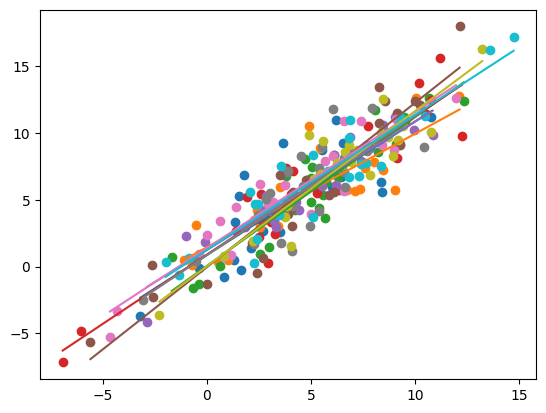

In [98]:
import matplotlib.pyplot as plt

for i, sample in enumerate(execution_info):
    x_sample = sample["x_sample"]
    y_sample = sample["y_sample"]
    B_1_est = sample["B_1_est"]
    B_0_est = sample["B_0_est"]
    plt.scatter(
        x=x_sample,
        y=y_sample,      
    )
    min_x = min(x_sample)
    max_x = max(x_sample)
    x_points = [min_x, max_x]
    y_points = [
        x * B_1_est + B_0_est
        for x in x_points
    ]
    plt.plot(x_points, y_points)

plt.show()

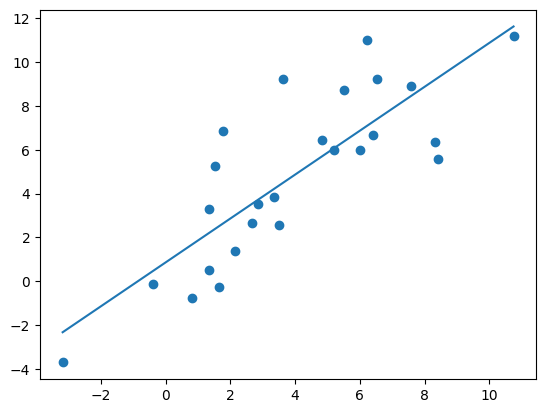

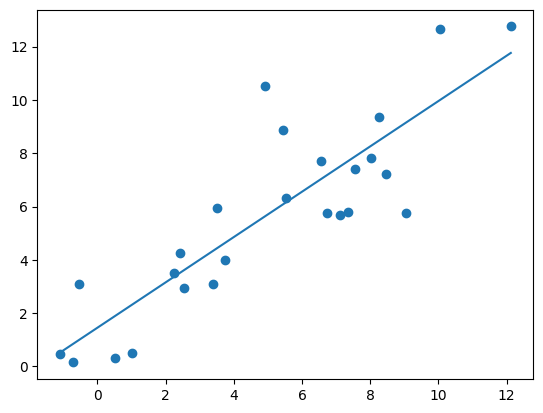

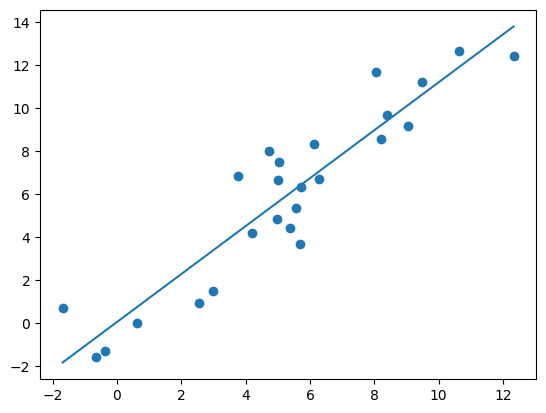

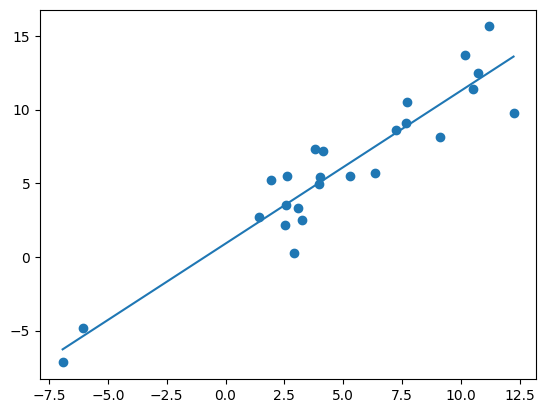

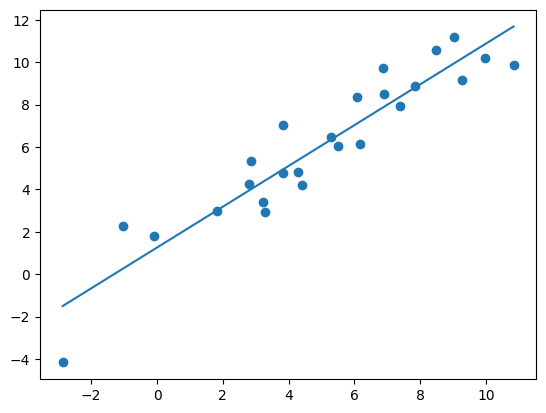

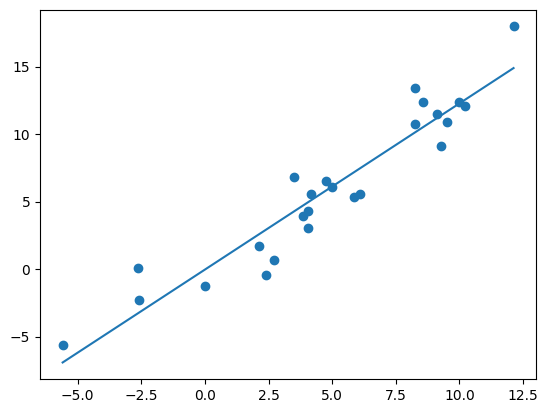

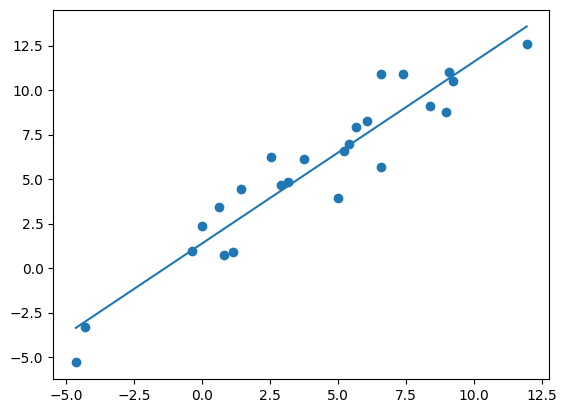

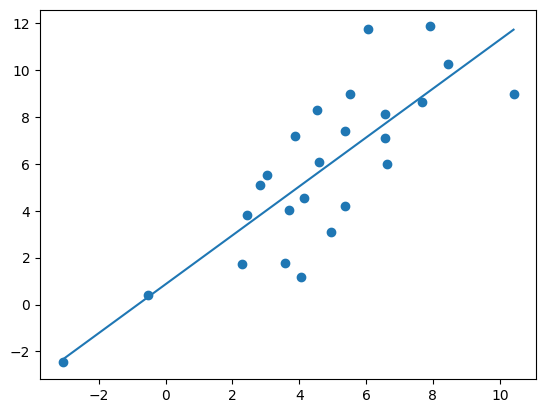

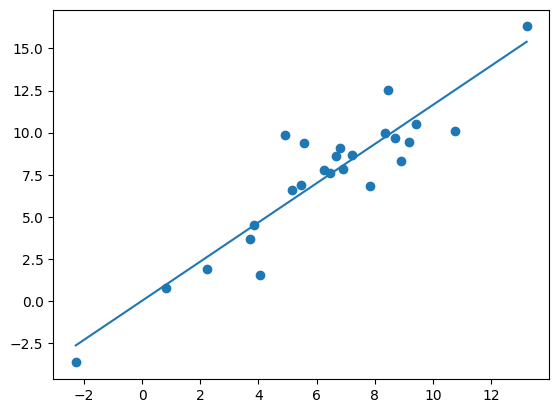

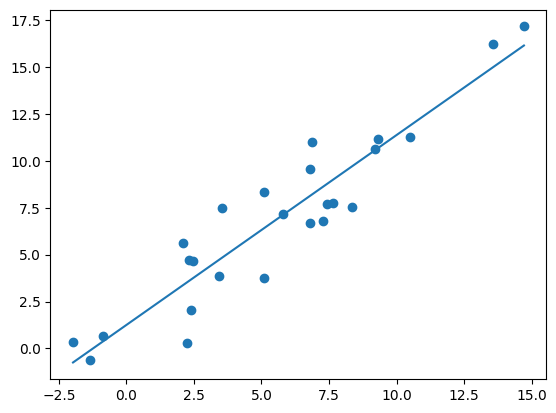

In [102]:
import matplotlib.pyplot as plt

for i, sample in enumerate(execution_info):
    x_sample = sample["x_sample"]
    y_sample = sample["y_sample"]
    B_1_est = sample["B_1_est"]
    B_0_est = sample["B_0_est"]
    plt.scatter(
        x=x_sample,
        y=y_sample,      
    )
    min_x = min(x_sample)
    max_x = max(x_sample)
    x_points = [min_x, max_x]
    y_points = [
        x * B_1_est + B_0_est
        for x in x_points
    ]
    plt.plot(x_points, y_points)
    plt.show()

## 2.I

Faça um histograma do R2 obtido com as K realizações. Compare com a estatística
F e comente.

(array([0.13503381, 0.18004508, 0.09002254, 0.04501127, 0.3150789 ,
        0.58514652, 0.49512398, 1.17029305, 1.21530432, 1.89047339,
        2.25056356, 3.19580025, 3.78094677, 4.86121728, 6.52663431,
        5.49137508, 5.13128491, 3.78094677, 2.92573262, 0.94523669]),
 array([0.48648298, 0.50869964, 0.5309163 , 0.55313296, 0.57534961,
        0.59756627, 0.61978293, 0.64199959, 0.66421624, 0.6864329 ,
        0.70864956, 0.73086622, 0.75308287, 0.77529953, 0.79751619,
        0.81973285, 0.84194951, 0.86416616, 0.88638282, 0.90859948,
        0.93081614]),
 <BarContainer object of 20 artists>)

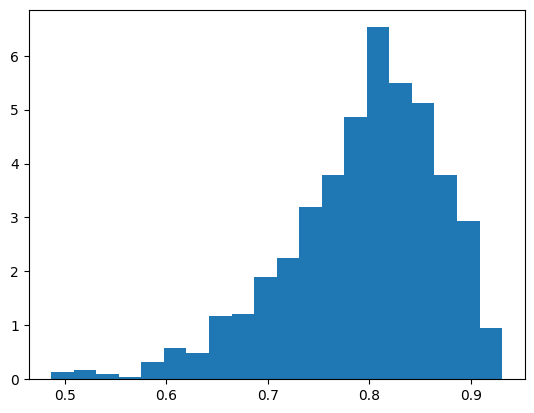

In [108]:
import matplotlib.pyplot as plt

plt.hist(x=R2_scores, bins=20, density=True)